In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pyiast as pyiast
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

ModuleNotFoundError: No module named 'pandas'

In [15]:
#Pore analysis
pore_analysis=pd.read_csv("Pore_Analysis.csv")
print(pore_analysis)
    

                                  Key                   Value
0                             ASA_A^2                 3964.65
1                        ASA_A^2_unit                     A^2
2                        ASA_m^2/cm^3                 2236.61
3                   ASA_m^2/cm^3_unit                m^2/cm^3
4                           ASA_m^2/g                 3876.39
5                      ASA_m^2/g_unit                   m^2/g
6            Channel_surface_area_A^2                 3964.65
7       Channel_surface_area_A^2_unit                     A^2
8                             Density                0.576983
9                        Density_unit                  g/cm^3
10                        Input_block            [1.525, 100]
11                         Input_cssr                    True
12                           Input_ha                     DEF
13                          Input_res                    True
14                           Input_sa  [1.525, 1.525, 100000]
15      

The desiered data are taken from the pore analysis document and displayed with the following code:

In [12]:

    #just need to print the differents data
print("The accessible surface area is:", (pore_analysis.loc[pore_analysis['Key'] == "ASA_A^2"]).iloc[0, 1] + " A^2")

print("The density is:",(pore_analysis.loc[pore_analysis['Key'] == "Density"]).iloc[0, 1] + " g/cm^3")

print("The accessible probeoccupiable volume is:",(pore_analysis.loc[pore_analysis['Key'] == "POAV_A^3"]).iloc[0, 1] + " A^2")

print("The porosity of the material is:",(pore_analysis.loc[pore_analysis['Key'] == "POAV_Volume_fraction"]).iloc[0, 1])



The accessible surface area is: 3964.65 A^2
The density is: 0.576983 g/cm^3
The accessible probeoccupiable volume is: 13737.4 A^2
The porosity of the material is: 0.77498


Extration of the values for the $CH_4$ at 300K

In [70]:
df_CH4=pd.read_csv("CH4_300K.csv")

#we need to extract the line 34 which contains the values for the isotherm and convert it to a dict (bc it was a str)
pressure_dict_CH4 = eval(df_CH4.iloc[34]['Value'])
pressure_CH4 = pressure_dict_CH4['pressure']
loading_absolute_dev_CH4 = pressure_dict_CH4["loading_absolute_dev"]
loading_absolute_average_CH4 = pressure_dict_CH4["loading_absolute_average"]

print(loading_absolute_average_CH4)
print(loading_absolute_dev_CH4)
#get henry coefficient and the unit
KH_CH4=df_CH4[df_CH4["Key"] == "henry_coefficient_average"]["Value"]
KH_CH4_unit=df_CH4[df_CH4["Key"] == "henry_coefficient_unit"]["Value"]


print(f"The average Henry coefficient is {float(KH_CH4.iloc[0])} {KH_CH4_unit.iloc[0]}")

[0.02211096026964, 0.08714510626096, 0.15903007841512, 0.22026542506496, 0.28835159787764, 0.35760663202616, 0.4238745760942, 0.50809752901556, 0.55540394474664, 0.62365245941152, 0.69138148014936, 0.76833151809216, 0.84528155603496, 0.8958023404396, 0.95057648137188, 1.0212925921902, 1.0812616723929, 1.158309115447]
[0.0028035831528122, 0.0065014618214603, 0.0068740992310244, 0.015869561669862, 0.011511216474789, 0.023656411032626, 0.02766106990789, 0.0089824203002865, 0.024536637760037, 0.0079837867669273, 0.020561888569046, 0.041388398561832, 0.045678462481654, 0.045892867252215, 0.052310404164161, 0.050144452354267, 0.071018532097502, 0.041123469532751]
The average Henry coefficient is 1.11889e-06 mol/kg/Pa


Extraction of the values for $CO_2$ at 300K

In [71]:
df_CO2=pd.read_csv("CO2_300K.csv")
print(df_CO2)




#we need to extract the line 34 which contains the values for the isotherm and convert it to a dict (bc it was a str)
pressure_dict_CO2 = eval(df_CO2.iloc[34]['Value'])

pressure_CO2 = pressure_dict_CO2['pressure']
loading_absolute_dev_CO2 = pressure_dict_CO2["loading_absolute_dev"]
loading_absolute_average_CO2 = pressure_dict_CO2["loading_absolute_average"]



#get henry coefficient and the unit
KH_CO2=df_CO2[df_CO2["Key"] == "henry_coefficient_average"]["Value"]
KH_CO2_unit=df_CO2[df_CO2["Key"] == "henry_coefficient_unit"]["Value"]


print(f"The average Henry coefficient is {float(KH_CO2.iloc[0])} {KH_CO2_unit.iloc[0]}")

                                         Key  \
0                                    Density   
1                               Density_unit   
2               Estimated_saturation_loading   
3          Estimated_saturation_loading_unit   
4                                Input_block   
5                                   Input_ha   
6                   Input_structure_filename   
7                                Input_volpo   
8                 Number_of_blocking_spheres   
9                                   POAV_A^3   
10                             POAV_A^3_unit   
11                      POAV_Volume_fraction   
12                 POAV_Volume_fraction_unit   
13                               POAV_cm^3/g   
14                          POAV_cm^3/g_unit   
15                                 PONAV_A^3   
16                            PONAV_A^3_unit   
17                     PONAV_Volume_fraction   
18                PONAV_Volume_fraction_unit   
19                              PONAV_cm

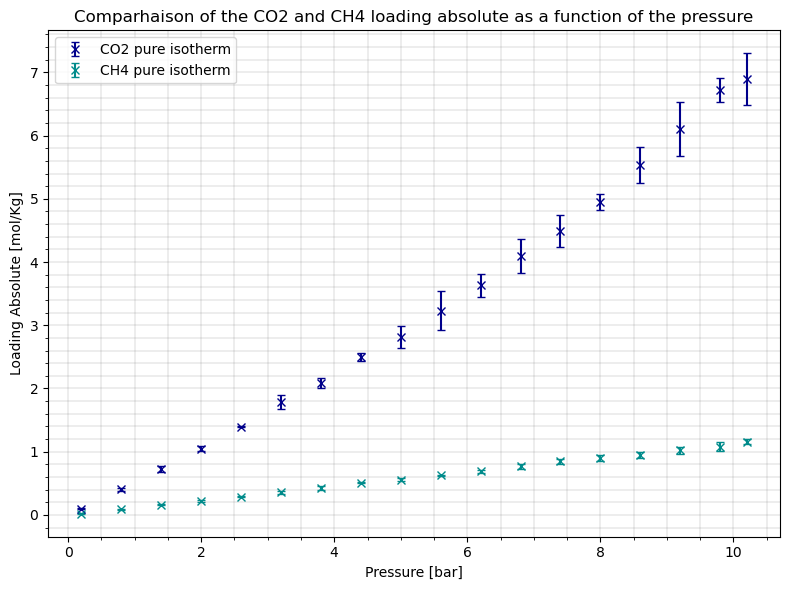

In [76]:
# Create a single subplot
plt.figure(figsize=(8, 6))

# Plot CO2 data with error bars
plt.errorbar(pressure_CO2, loading_absolute_average_CO2, yerr=loading_absolute_dev_CO2,
             marker="x", color='Darkblue', linestyle='None', label="CO2 pure isotherm", capsize=3)

# Plot CH4 data with error bars
plt.errorbar(pressure_CH4, loading_absolute_average_CH4, yerr=loading_absolute_dev_CH4,
             marker="x", color='Darkcyan', linestyle='None', label="CH4 pure isotherm", capsize=3)

# Set title and labels
plt.title("Comparhaison of the CO2 and CH4 loading absolute as a function of the pressure")
plt.ylabel("Loading Absolute [mol/Kg]")
plt.xlabel("Pressure [bar]")

# Enable minor ticks and add grid
plt.minorticks_on()  
plt.grid(which="both", linewidth="0.2", color="grey")

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()